## Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Exploratory Data Analysis

In [2]:
cols = ['fLength','fWidth','fSize','Conc','Conc1','fAsym','fM3Long','fM3Trans','fAlpha','fDist','class']
df = pd.read_csv('/kaggle/input/magic-dataset/magic04.data',names=cols)

In [3]:
df.head()

,fLength,fWidth,fSize,Conc,Conc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,g
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,g
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,g
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,g
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,g


In [4]:
df['class'].unique()

array(['g', 'h'], dtype=object)

In [5]:
df['class'] = (df['class']=='g').astype(int)

In [6]:
df.head()

,fLength,fWidth,fSize,Conc,Conc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,1
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,1
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,1
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,1
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,1


In [7]:
df.shape

(19020, 11)

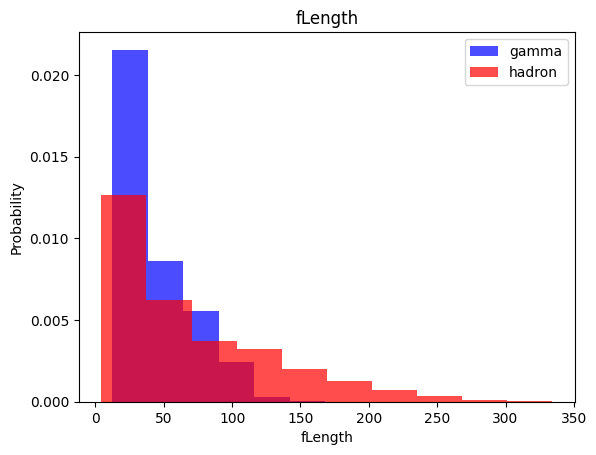

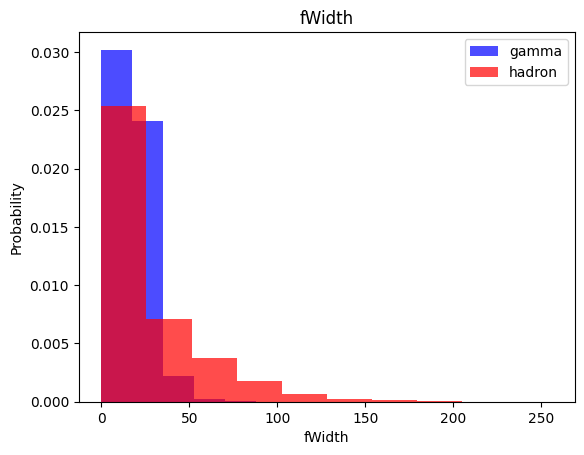

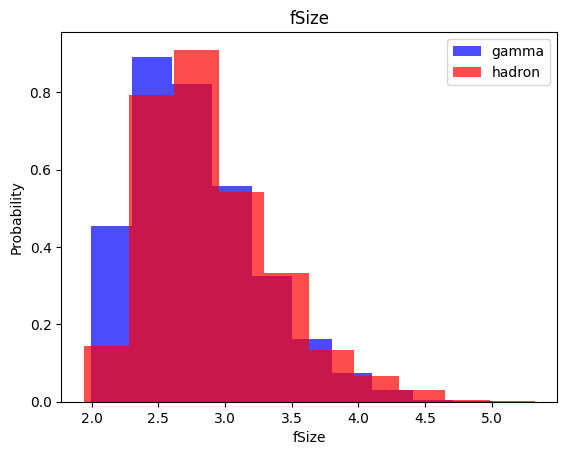

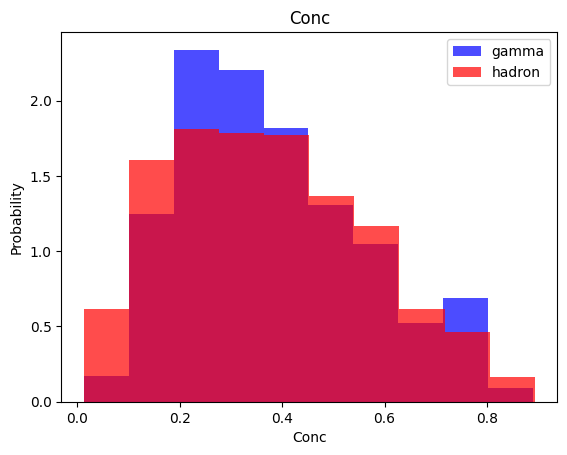

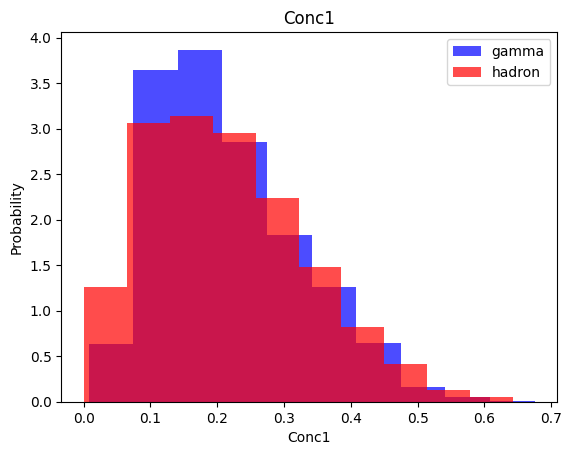

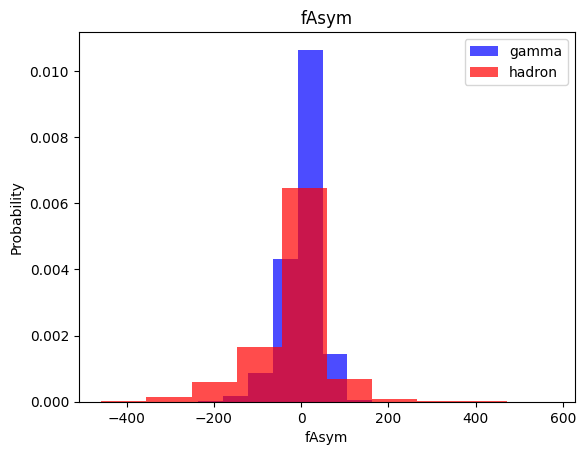

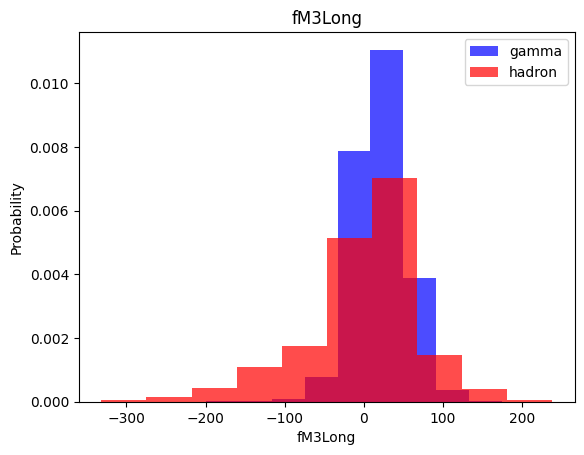

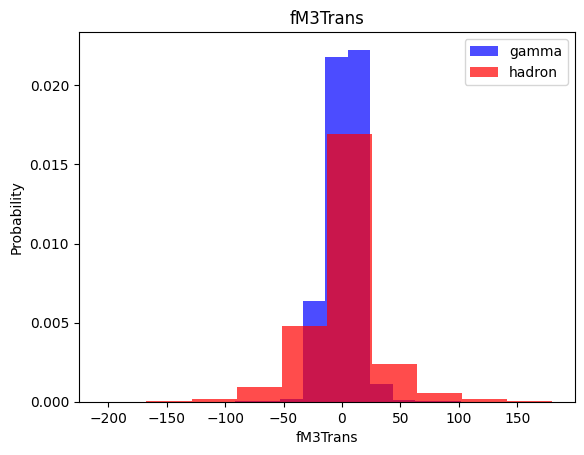

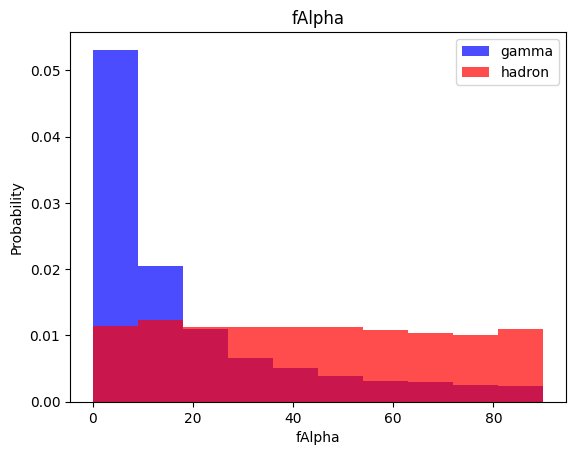

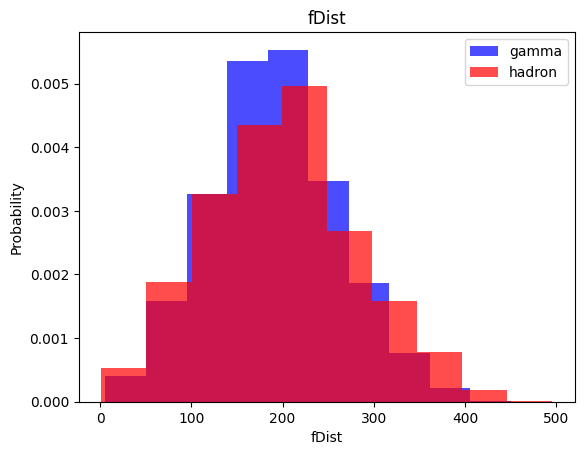

In [8]:
for label in cols[:-1]:
    plt.hist(df[df['class']==1][label],color='blue',label='gamma', alpha=0.7,density=True)
    plt.hist(df[df['class']==0][label],color='red',label='hadron', alpha=0.7,density=True)
    
    plt.title(label)
    plt.ylabel('Probability')
    plt.xlabel(label)
    plt.legend()
    plt.show()

## Train, Validation and Test Splits

In [9]:
train,val,test = np.split(df.sample(frac=1),[int(0.6*len(df)),int(0.8*len(df))])

/opt/conda/lib/python3.10/site-packages/numpy/core/fromnumeric.py:59: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


## Scaling the dataset

In [10]:
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler

In [11]:
def scale_dataset(dataframe,oversample=False):
    X = dataframe[dataframe.columns[:-1]].values
    y = dataframe[dataframe.columns[-1]].values
    
    scaler = StandardScaler()
    X = scaler.fit_transform(X)
    
    if oversample:
        ros = RandomOverSampler()
        X,y = ros.fit_resample(X,y)
    
    data = np.hstack((X,np.reshape(y,(-1,1))))
    
    return data,X,y

In [12]:
train,X_train,y_train = scale_dataset(train,oversample=True)
val,X_val,y_val = scale_dataset(val,oversample=False)
test,X_test,y_test = scale_dataset(test,oversample=False)

In [13]:
len(y_train)

14648

In [14]:
sum(y_train ==1)

7324

In [15]:
sum(y_train==0)

7324

In [16]:
from sklearn.metrics import classification_report

## kNN

In [17]:
from sklearn.neighbors import KNeighborsClassifier

In [18]:
knn_model = KNeighborsClassifier(n_neighbors=3)
knn_model.fit(X_train,y_train)
y_pred = knn_model.predict(X_test)

In [19]:
y_pred

array([1, 1, 1, ..., 0, 1, 1])

In [20]:
y_test

array([1, 1, 1, ..., 0, 1, 0])

In [21]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.72      0.75      0.73      1308
           1       0.86      0.84      0.85      2496

    accuracy                           0.81      3804
   macro avg       0.79      0.80      0.79      3804
weighted avg       0.81      0.81      0.81      3804



## Naive Bayes

In [22]:
from sklearn.naive_bayes import GaussianNB
modelNB = GaussianNB()

modelNB.fit(X_train, y_train)

y_pred = modelNB.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.67      0.41      0.51      1308
           1       0.74      0.90      0.81      2496

    accuracy                           0.73      3804
   macro avg       0.71      0.65      0.66      3804
weighted avg       0.72      0.73      0.71      3804



## Logistic Regression

In [23]:
from sklearn.linear_model import LogisticRegression
modelLOR = LogisticRegression()

modelLOR.fit(X_train, y_train)

y_pred = modelLOR.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.67      0.72      0.70      1308
           1       0.85      0.81      0.83      2496

    accuracy                           0.78      3804
   macro avg       0.76      0.77      0.76      3804
weighted avg       0.79      0.78      0.78      3804



## Support Vector Machines

In [24]:
from sklearn.svm import SVC
model_svc = SVC()

model_svc.fit(X_train, y_train)

y_pred = model_svc.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.78      0.80      0.79      1308
           1       0.90      0.88      0.89      2496

    accuracy                           0.86      3804
   macro avg       0.84      0.84      0.84      3804
weighted avg       0.86      0.86      0.86      3804

